# **MÓDULO 14 - Exercício**
# Pré Processamento dos Dados - A primeira etapa Pré Modelagem

Para nossa atividade usaremos uma base de churn também, porém essa base não diz respeito a serviços bancários e sim serviços de internet, telefone e tv - Telecomunicação.

Vamos realizar aqui as etapas de limpeza e tratamento de dados vistos durante a aula, porém aplicados a essa base nova.

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [26]:
#Lembrem-se sempre de alterar a importação dos dados de acordo com o diretório de vocês.
df = pd.read_csv("CHURN_TELECON_MOD08_TAREFA.csv", delimiter=';')

df.head(10)

,customerID,Genero,Idoso,Casado,Dependents,Tempo_como_Cliente,PhoneService,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,PaymentMethod,Pagamento_Mensal,Total_Pago,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,DSL,No,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,DSL,Yes,No,No,One year,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,DSL,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,DSL,Yes,Yes,No,One year,Bank transfer (automatic),NaN,1840.75,No
4,9237-HQITU,NaN,0,No,No,2,Yes,Fiber optic,No,No,No,Month-to-month,Electronic check,NaN,151.65,Yes
5,9305-CDSKC,NaN,0,No,No,8,Yes,Fiber optic,No,No,Yes,Month-to-month,Electronic check,NaN,820.50,NaN
6,1452-KIOVK,NaN,0,No,Yes,22,Yes,Fiber optic,No,No,Yes,Month-to-month,Credit card (automatic),NaN,1949.40,NaN
7,6713-OKOMC,NaN,0,No,No,10,No,DSL,Yes,No,No,Month-to-month,Mailed check,NaN,301.90,NaN
8,7892-POOKP,NaN,0,Yes,No,28,Yes,Fiber optic,No,Yes,Yes,Month-to-month,Electronic check,NaN,3046.05,NaN
9,6388-TABGU,NaN,0,No,Yes,62,Yes,dsl,Yes,No,No,One year,Bank transfer (automatic),NaN,3487.95,NaN


Legenda dos dados:

*   **CustomerID** : Esse é o ID único de cada cliente nosso da rede de produtos de telecomunicação.

*   **Genero** : O genero dos nossos clientes.

*   **Idoso** : Se nosso cliente tem acima de 60 anos ou não. (Sim = 1 | Não = 0)

*   **Casado** : Se nosso cliente é casado ou não.

*   **Dependents** : Se cliente tem dependentes.

*   **Tempo_como_Cliente** : Tempo em meses que nosso cliente está com a nossa empresa.

*   **PhoneService** : Se ele contratou serviço telefônico com a nossa empresa.

*   **Servico_Internet** : Qual o tipo de serviço de internet contratado.

*   **Servico_Seguranca** : Se ele contratou serviço de segurança com a nossa empresa.

*   **Suporte_Tecnico** : Se já acionou o suporte técnico.

*   **StreamingTV** : Se ele contratou serviço de streaming para TV.

*   **Tipo_Contrato** : Qual o tipo de contrato dos nossos clientes, se era mensal, anual etc.

*   **Tipo_Contrato** : Qual o tipo de contrato dos nossos clientes, se era mensal, anual etc.

*   **PaymentMethod** : Forma de Pagamento.

*   **Pagamento_Mensal** : Quanto o cliente pagava mensalmente.

*   **Total_Pago** : Total já pago pelo cliente para nossa companhia.

*   **Churn** : Nossa coluna mais importante, se nosso cliente nos abandonou ou não.




# 1 - Carregue a base, verifique se os tipos de dados estão de acordo com cada coluna e caso não estejam realize a transformação dos tipos de dados.

In [27]:
#seu código aqui
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customerID          2500 non-null   object 
 1   Genero              2488 non-null   object 
 2   Idoso               2500 non-null   int64  
 3   Casado              2500 non-null   object 
 4   Dependents          2500 non-null   object 
 5   Tempo_como_Cliente  2500 non-null   int64  
 6   PhoneService        1018 non-null   object 
 7   Servico_Internet    2500 non-null   object 
 8   Servico_Seguranca   2500 non-null   object 
 9   Suporte_Tecnico     2500 non-null   object 
 10  StreamingTV         2500 non-null   object 
 11  Tipo_Contrato       2500 non-null   object 
 12  PaymentMethod       2500 non-null   object 
 13  Pagamento_Mensal    2175 non-null   float64
 14  Total_Pago          2500 non-null   float64
 15  Churn               2495 non-null   object 
dtypes: flo

# 2 - Esse exercício faremos por etapas:
A) Verifique se temos colunas com dados faltantes e traga a % dos dados faltantes por coluna.

In [28]:
#seu código aqui
(df.isnull().sum() / len(df)) * 100

customerID             0.00
Genero                 0.48
Idoso                  0.00
Casado                 0.00
Dependents             0.00
Tempo_como_Cliente     0.00
PhoneService          59.28
Servico_Internet       0.00
Servico_Seguranca      0.00
Suporte_Tecnico        0.00
StreamingTV            0.00
Tipo_Contrato          0.00
PaymentMethod          0.00
Pagamento_Mensal      13.00
Total_Pago             0.00
Churn                  0.20
dtype: float64

B) Exclua nessa etapa as linhas das colunas com dados faltantes que você analisar que esse método é o ideal. Justifique o motivo de estar excluindo essas linhas.

In [43]:
#seu código aqui
df.dropna(subset=['Genero'], inplace=True)
df['Genero'].isnull().sum()
#JUSTIFICATIVA: Estou excluindo a coluna gênero devido a baixa quantidade de dados nulos. Como a porcentagem é de 0.48, ou seja não chega nem mesmo a 1%,
#o melhor caminho é deletar esses dados levando em conta que a ausencia deles não irá afetar a analise posterior do dataframe.

np.int64(0)

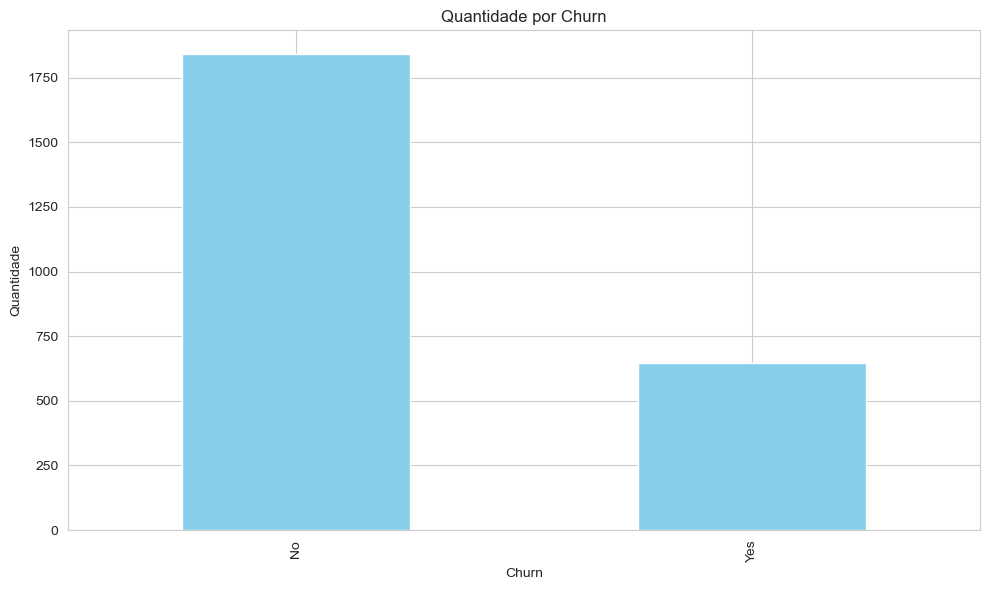

In [42]:
#Coluna Churn

# Contar tipos de serviço
contagem = df['Churn'].value_counts()

# Gráfico simples
plt.figure(figsize=(10, 6))
contagem.plot(kind='bar', color='skyblue')
plt.title('Quantidade por Churn')
plt.xlabel('Churn')
plt.ylabel('Quantidade')
plt.tight_layout()
plt.show()

In [44]:
#JUSTIFICATIVA: A coluna Churn são os dados que mais nos interessa no Dataframe. Neste caso a quantidade de "No" é muito maior que a de "Yes". 
#Além disso a porcentagem de dados nulos é muito pequena (0,20%). Então para evitar inconsistencias e como a quantidade de dados nulos são pequenas
#resolvi deletar os dados vazios.

df.dropna(subset=['Churn'], inplace=True)
df['Churn'].isnull().sum()

np.int64(0)

C) Nessa etapa substitua pela média, mediana ou moda as linhas das colunas com valores faltantes que você analisou e entendeu que esse era o melhor método. Não se esqueça de justificar sua escolha.

**Dica variáveis numéricas:** Não se esqueça de verificar a distrbuição dos dados, média e mediana.

**Dica variáveis categóricas:** Caso precise substituir uma variável categórica utilize um gráfico de barras para verificar a que mais aparece e utilizar ela na substituição.
Ou você pode optar por excluir a coluna, mas justifique sua escolha.

Caso opte por substituir você pode utilizar a função fillna:
df['SUACOLUNA'].fillna("VALOR QUE SUBSTITUIRA O NULO", inplace=True)
Ela funcionará como a replace.

In [30]:
#seu código aqui
df['Pagamento_Mensal'].mean()

np.float64(65.60756321839081)

In [31]:
df['Pagamento_Mensal'].median()

71.45

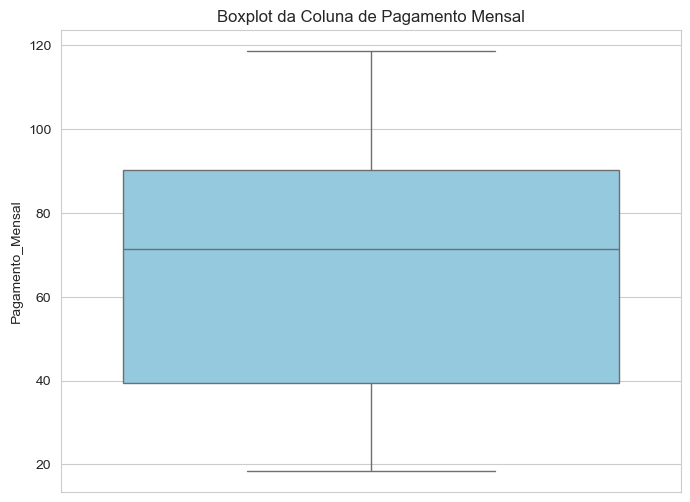

In [32]:
sns.set_style('whitegrid')

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='Pagamento_Mensal', color='skyblue')
plt.title('Boxplot da Coluna de Pagamento Mensal')
plt.ylabel('Pagamento_Mensal')
plt.show()

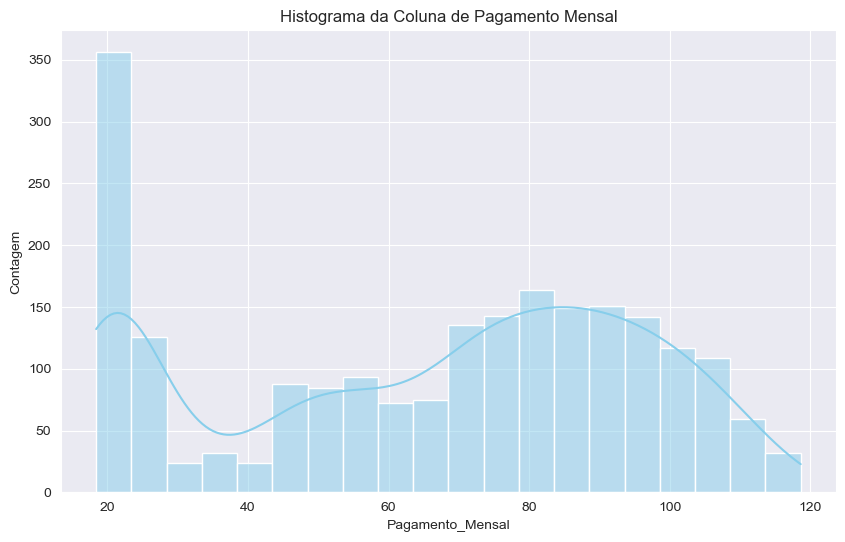

In [33]:
sns.set_style('darkgrid')

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Pagamento_Mensal', bins=20, kde=True, color='skyblue')
plt.title('Histograma da Coluna de Pagamento Mensal')
plt.xlabel('Pagamento_Mensal')
plt.ylabel('Contagem')
plt.show()

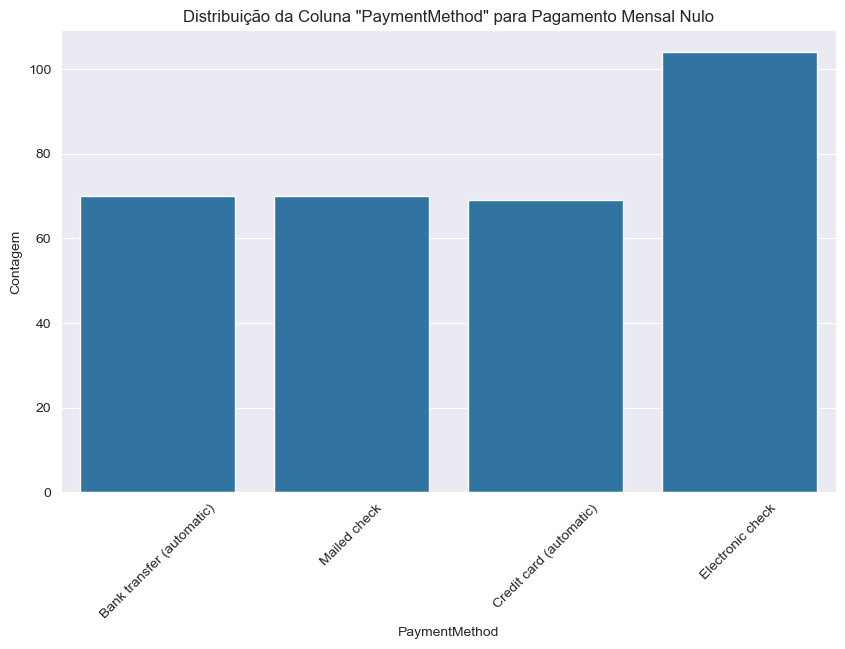

In [34]:
df_mensal_nulo = df[df['Pagamento_Mensal'].isnull()]

plt.figure(figsize=(10, 6))
sns.countplot(data=df_mensal_nulo, x='PaymentMethod')
plt.title('Distribuição da Coluna "PaymentMethod" para Pagamento Mensal Nulo')
plt.xlabel('PaymentMethod')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()

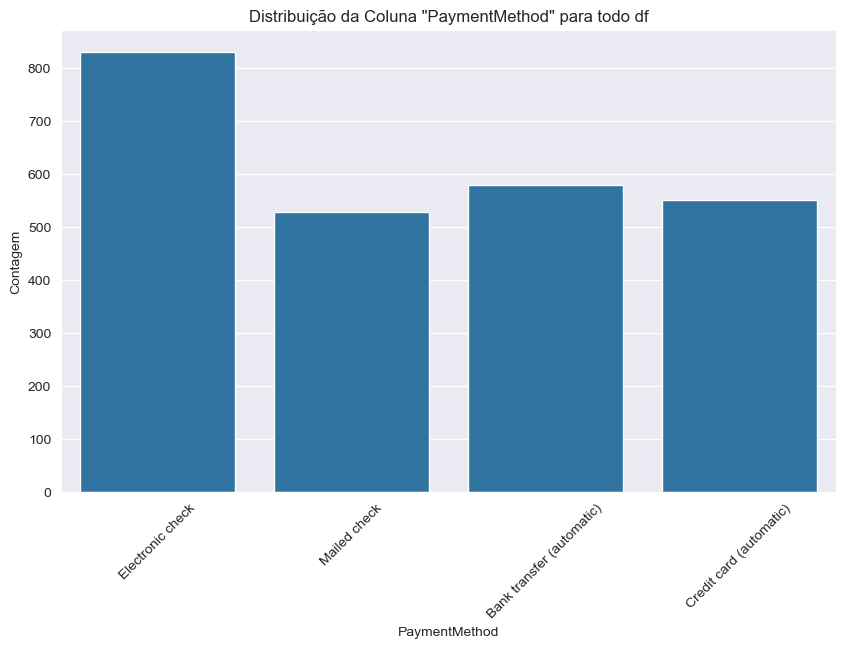

In [35]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='PaymentMethod')
plt.title('Distribuição da Coluna "PaymentMethod" para todo df')
plt.xlabel('PaymentMethod')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()

In [36]:
medianas = df.groupby('PaymentMethod')['Pagamento_Mensal'].median()

print(medianas)


PaymentMethod
Bank transfer (automatic)    75.400
Credit card (automatic)      74.925
Electronic check             80.450
Mailed check                 28.000
Name: Pagamento_Mensal, dtype: float64


In [37]:
medias = df.groupby('PaymentMethod')['Pagamento_Mensal'].mean()

print(medias)

PaymentMethod
Bank transfer (automatic)    69.572888
Credit card (automatic)      67.944295
Electronic check             75.424725
Mailed check                 43.179803
Name: Pagamento_Mensal, dtype: float64


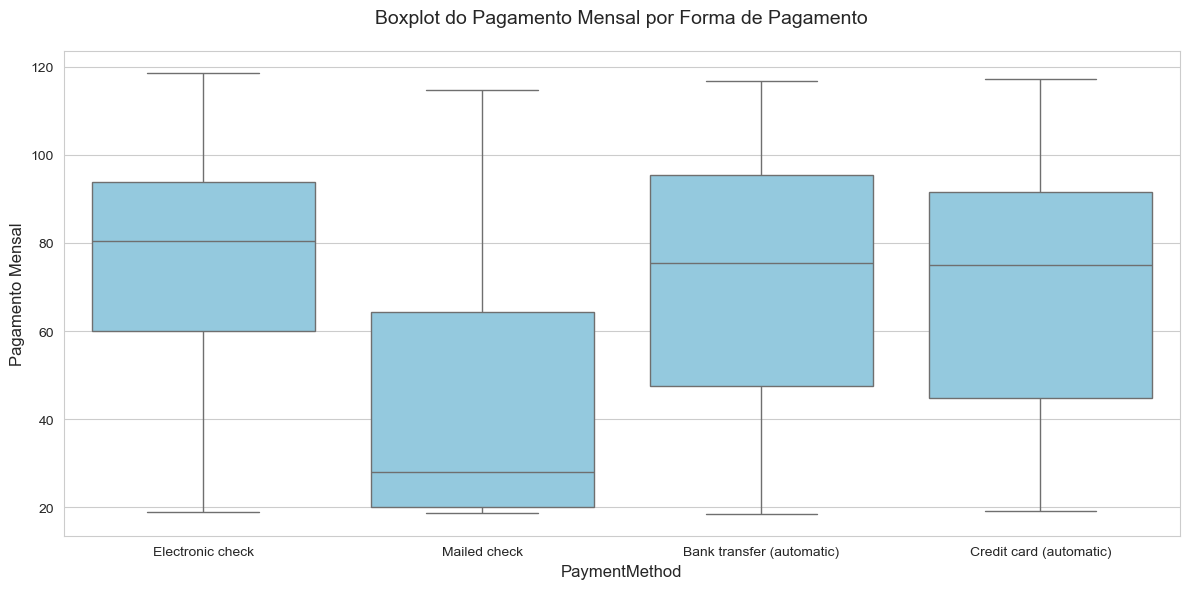

In [38]:
sns.set_style('whitegrid')

# Boxplot separado por forma de pagamento
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='PaymentMethod', y='Pagamento_Mensal', color='skyblue')
plt.title('Boxplot do Pagamento Mensal por Forma de Pagamento', fontsize=14, pad=20)
plt.xlabel('PaymentMethod', fontsize=12)
plt.ylabel('Pagamento Mensal', fontsize=12)
plt.tight_layout()
plt.show()

In [39]:
#JUSTIFICATIVA: a coluna Pagamento_Mensal tem 13% de dados faltantes. Como esse campo pode ser um atributo importante para a identificação do churn,
#a melhor proposta seria substituir os dados. Verifiquei os valores nulos por cada forma de pagamento e defini que o melhor caminho seria substituir
#pela mediana já que pelo boxPlot pude notar que em cada forma de pagamento a mediana está bem diferente da média. Por isso, afim de 
#preservar a distribuição dos dados optei por substituir os valores nulos pela mediana de cada forma de pagamento.

df['Pagamento_Mensal'] = df.groupby('PaymentMethod')['Pagamento_Mensal'].transform(
    lambda x: x.fillna(x.median())
)
df['Pagamento_Mensal'].isnull().sum()

np.int64(0)

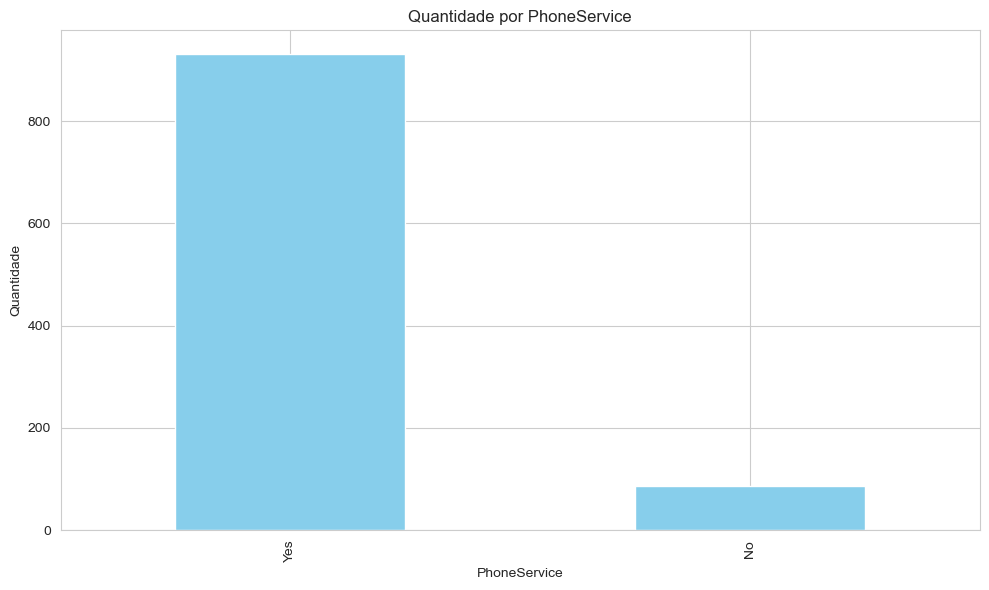

In [19]:
#Coluna PhoneService

# Contar tipos de serviço
contagem = df['PhoneService'].value_counts()

# Gráfico simples
plt.figure(figsize=(10, 6))
contagem.plot(kind='bar', color='skyblue')
plt.title('Quantidade por PhoneService')
plt.xlabel('PhoneService')
plt.ylabel('Quantidade')
plt.tight_layout()
plt.show()

In [23]:
#JUSTIFICATIVA:Como a quantidade de valores "yes" são muito maiores que os "No", substituir pela moda poderia enviezar os dados. No entanto remover 
#não acredito ser o melhor caminho pois o percentual de dados nulos é acima da metade, são 59%. Por isso acredito ser melhor criar
#uma nova categoria chamada desconhecida, para não perder os dados e não enviezar o dataframe.

df['PhoneService'] = df['PhoneService'].fillna('Desconhecido')
df['PhoneService'].isnull().sum()

np.int64(0)

# 3 - Verifique se encontramos valores digitados incorretamente, ou com letras maiusculas ou minusculas, ou até mesmo mesmos valores porém escritos de forma dirente e corrija.

In [45]:
#seu código aqui
df['Servico_Internet'].unique()

array(['DSL', 'No', 'Fiber optic', 'dsl'], dtype=object)

In [46]:
df['Servico_Internet'] = df['Servico_Internet'].str.lower()
df['Servico_Internet'].unique()

array(['dsl', 'no', 'fiber optic'], dtype=object)

In [47]:
df['Servico_Seguranca'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [48]:
df['Suporte_Tecnico'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [49]:
df['StreamingTV'].unique()

array(['No', 'No internet service', 'Yes'], dtype=object)

In [50]:
df['Tipo_Contrato'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

# [EXTRA] 4 - Caso deseje, para manter um padrão na sua base, renomeie as colunas ou deixando em português, ou inglês.

In [52]:
df.rename(columns={'Dependents': 'Dependentes'}, inplace=True)

In [53]:
df.rename(columns={'PhoneService': 'Servico_Telefonico'}, inplace=True)

In [54]:
df.rename(columns={'PaymentMethod': 'Forma_Pagamento'}, inplace=True)

In [57]:
df.head(10)

,customerID,Genero,Idoso,Casado,Dependentes,Tempo_como_Cliente,Servico_Telefonico,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,Forma_Pagamento,Pagamento_Mensal,Total_Pago,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,dsl,No,No,No,Month-to-month,Electronic check,29.850,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,dsl,Yes,No,No,One year,Mailed check,56.950,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,dsl,Yes,No,No,Month-to-month,Mailed check,53.850,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,dsl,Yes,Yes,No,One year,Bank transfer (automatic),75.400,1840.75,No
16,8191-XWSZG,F,0,No,No,52,Yes,no,No internet service,No internet service,No internet service,One year,Mailed check,28.000,1022.95,No
17,9959-WOFKT,Male,0,No,Yes,71,Yes,fiber optic,Yes,No,Yes,Two year,Bank transfer (automatic),75.400,7382.25,No
18,4190-MFLUW,F,0,Yes,Yes,10,Yes,dsl,No,Yes,No,Month-to-month,Credit card (automatic),74.925,528.35,Yes
19,4183-MYFRB,F,0,No,No,21,Yes,fiber optic,No,No,No,Month-to-month,Electronic check,80.450,1862.90,No
20,8779-QRDMV,Male,1,No,No,1,No,dsl,No,No,No,Month-to-month,Electronic check,80.450,39.65,Yes
21,1680-VDCWW,Male,0,Yes,No,12,Yes,no,No internet service,No internet service,No internet service,One year,Bank transfer (automatic),75.400,202.25,No
